In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('CafeF.HNX.Upto29.04.2025.csv')
data

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,AAV,20250429,8.4000,8.8000,7.5000,8.4000,4291124
1,AMC,20250429,16.5000,16.6000,16.5000,16.6000,1600
2,API,20250429,5.5000,5.5000,5.3000,5.3000,205150
3,APS,20250429,5.3000,5.3000,5.2000,5.2000,167657
4,BAB,20250429,11.2000,11.2000,11.2000,11.2000,121
...,...,...,...,...,...,...,...
852102,SGH,20010725,5.2349,5.2349,5.2349,5.2375,200
852103,SGH,20010723,4.8997,4.8997,4.8997,4.9022,300
852104,SGH,20010720,4.5805,4.5805,4.5805,4.5828,200
852105,SGH,20010718,4.2932,4.2932,4.2932,4.2954,200


Lấy thông tin cổ phiếu VNF

In [5]:
df = data[data['<Ticker>'] == 'VNF']
df = df.drop('<Ticker>', axis=1)
df = df.iloc[::-1]
df.reset_index(drop=True,inplace=True)
df


,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,20101201,5.0006,6.4781,5.0006,6.1601,254500
1,20101202,6.2280,6.2280,6.2280,6.2283,24700
2,20101203,6.6599,6.6599,6.6599,6.6602,19500
3,20101206,7.1145,7.1145,7.1145,7.1148,54500
4,20101207,7.5918,7.5918,7.5918,7.5922,126900
...,...,...,...,...,...,...
2439,20250423,14.7000,14.9000,14.5000,14.9000,34527
2440,20250424,14.8000,14.8000,14.8000,14.8000,100
2441,20250425,14.9000,15.6000,14.9000,15.4000,23300
2442,20250428,15.2000,15.2000,15.0000,15.0000,177500


ÁP dụng chiến lược MA20 MA50 trong việc mua bán cổ phiếu.
Tạo tín hiệu mua nếu MA20 lớn hơn MA50 (đường MA20 cắt lên trên MA50) và ngược lại

In [6]:
df['MA20'] = df['<Close>'].rolling(window=20).mean()
df['MA50'] = df['<Close>'].rolling(window=50).mean()
df['Signal'] = [1 if df.loc[id, 'MA20'] > df.loc[id, 'MA50'] else 0 for id in df.index] # 1 là mua 0 la ban
df['Close_new'] = df['<Close>'].shift(-1)
df['Profit'] = [df.loc[id, 'Close_new'] - df.loc[id, '<Close>'] if df.loc[id, 'Signal'] == 1 else 0 for id in df.index]
df


,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>,MA20,MA50,Signal,Close_new,Profit
0,20101201,5.0006,6.4781,5.0006,6.1601,254500,NaN,NaN,0,6.2283,0.0
1,20101202,6.2280,6.2280,6.2280,6.2283,24700,NaN,NaN,0,6.6602,0.0
2,20101203,6.6599,6.6599,6.6599,6.6602,19500,NaN,NaN,0,7.1148,0.0
3,20101206,7.1145,7.1145,7.1145,7.1148,54500,NaN,NaN,0,7.5922,0.0
4,20101207,7.5918,7.5918,7.5918,7.5922,126900,NaN,NaN,0,8.1150,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2439,20250423,14.7000,14.9000,14.5000,14.9000,34527,14.220,15.520,0,14.8000,0.0
2440,20250424,14.8000,14.8000,14.8000,14.8000,100,14.210,15.460,0,15.4000,0.0
2441,20250425,14.9000,15.6000,14.9000,15.4000,23300,14.225,15.420,0,15.0000,0.0
2442,20250428,15.2000,15.2000,15.0000,15.0000,177500,14.190,15.364,0,15.3000,0.0


In [7]:
df['Date'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')

In [8]:
def plot_with_signals(df, start_date=None, signal = False):
    # Nếu không truyền ngày, mặc định lấy 200 ngày gần nhất
    if start_date is None:
        df_plot = df.tail(200)
    else:
        df_plot = df[df['Date'] >= pd.to_datetime(start_date)]

    plt.figure(figsize=(14, 6))

    plt.plot(df_plot['Date'], df_plot['<Close>'], label='Close Price', color='blue', alpha=0.6)
    plt.plot(df_plot['Date'], df_plot['MA20'], label='MA20', color='green', linestyle='--')
    plt.plot(df_plot['Date'], df_plot['MA50'], label='MA50', color='red', linestyle='--')

    if signal:   
        buy_signals = df_plot[df_plot['Signal'] == 1]
        plt.scatter(buy_signals['Date'], buy_signals['<Close>'], label='Buy', marker='^', color='green', s=100)
        
        sell_signals = df_plot[df_plot['Signal'] == 0]
        plt.scatter(sell_signals['Date'], sell_signals['<Close>'], label='Sell', marker='v', color='red', s=100)

    plt.title('Close Price with MA20, MA50 and Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Quan sát biến động giá đóng cửa và MA20, MA50

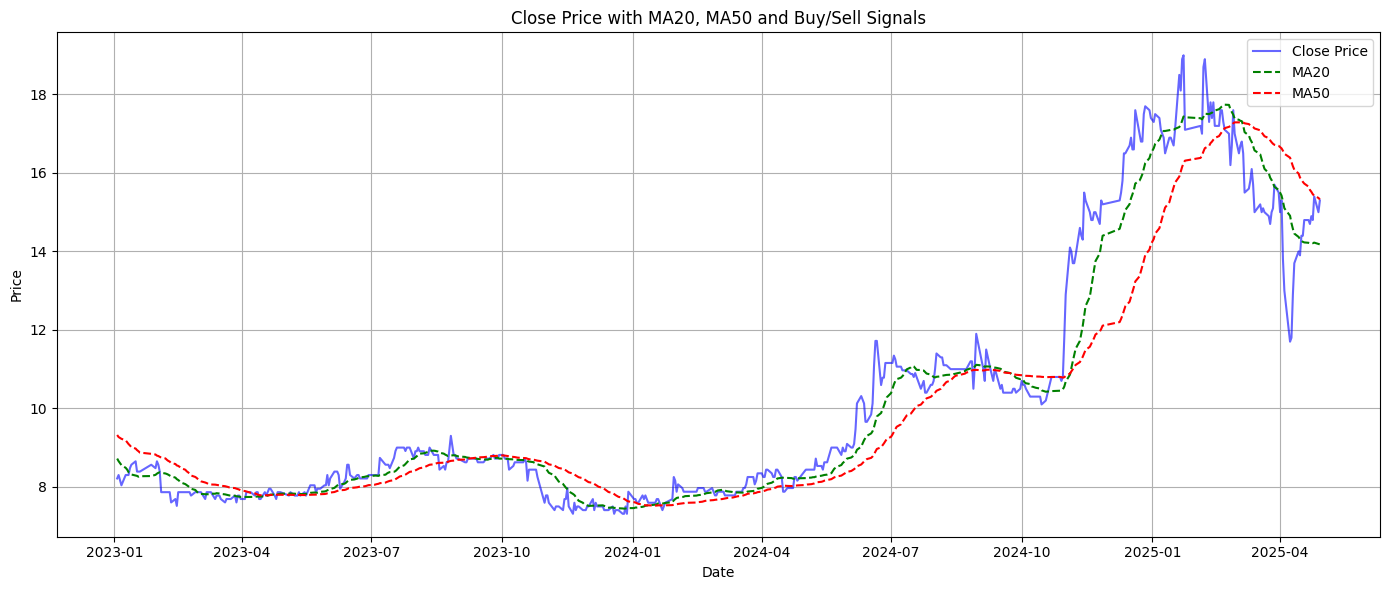

In [9]:
plot_with_signals(df, start_date='2023-01-01')

Thêm tín hiệu mua bán

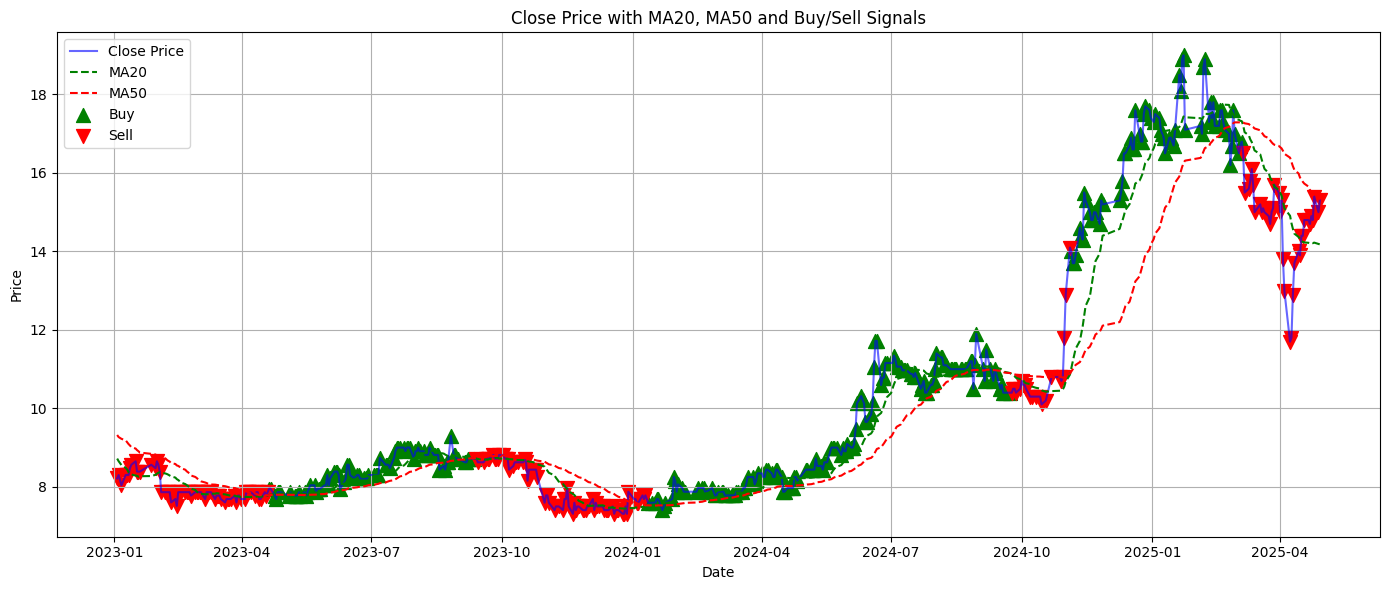

In [10]:
plot_with_signals(df, start_date='2023-01-01', signal=True)

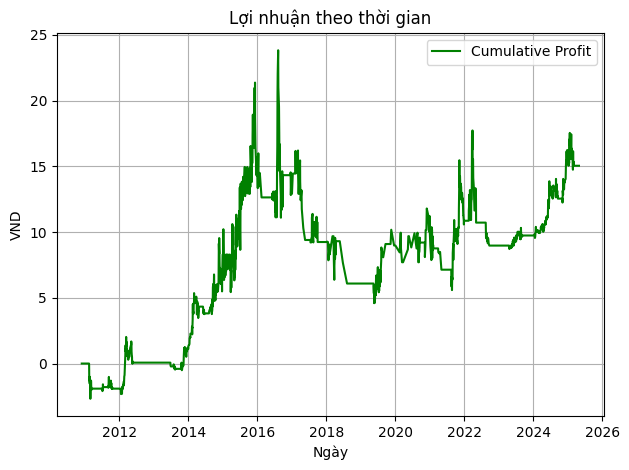

In [11]:
df['Cumulative_Profit'] = df['Profit'].cumsum()
plt.plot(df['Date'], df['Cumulative_Profit'], label='Cumulative Profit', color='green')
plt.title('Lợi nhuận theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('VND')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
total_profit = df['Profit'].sum()
print(total_profit)

15.048499999999995


Lợi nhuận thu được 15.000 trên 1 cổ phiếu với chiến lược đầu tư trên sau 15 năm

ÁP dụng chiến lược Bollinger Bands

In [13]:
df['STD20'] = df['<Close>'].rolling(window=20).std()
df['Upper_BB'] = df['MA20'] + 2 * df['STD20']
df['Lower_BB'] = df['MA20'] - 2 * df['STD20']

# Tạo tín hiệu Bollinger Bands
df['Signal_BB'] = [1 if df.loc[id, '<Close>'] <= df.loc[id, 'Lower_BB'] else 
                   (-1 if df.loc[id, '<Close>'] >= df.loc[id, 'Upper_BB'] else 0) 
                   for id in df.index]

# Tính lợi nhuận (chỉ khi Signal_BB = 1)
df['Profit_BB'] = [df.loc[id, 'Close_new'] - df.loc[id, '<Close>'] if df.loc[id, 'Signal_BB'] == 1 else 0 
                for id in df.index]

df

,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>,MA20,MA50,Signal,Close_new,Profit,Date,Cumulative_Profit,STD20,Upper_BB,Lower_BB,Signal_BB,Profit_BB
0,20101201,5.0006,6.4781,5.0006,6.1601,254500,NaN,NaN,0,6.2283,0.0,2010-12-01,0.0000,NaN,NaN,NaN,0,0.0
1,20101202,6.2280,6.2280,6.2280,6.2283,24700,NaN,NaN,0,6.6602,0.0,2010-12-02,0.0000,NaN,NaN,NaN,0,0.0
2,20101203,6.6599,6.6599,6.6599,6.6602,19500,NaN,NaN,0,7.1148,0.0,2010-12-03,0.0000,NaN,NaN,NaN,0,0.0
3,20101206,7.1145,7.1145,7.1145,7.1148,54500,NaN,NaN,0,7.5922,0.0,2010-12-06,0.0000,NaN,NaN,NaN,0,0.0
4,20101207,7.5918,7.5918,7.5918,7.5922,126900,NaN,NaN,0,8.1150,0.0,2010-12-07,0.0000,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,20250423,14.7000,14.9000,14.5000,14.9000,34527,14.220,15.520,0,14.8000,0.0,2025-04-23,15.0485,1.134437,16.488874,11.951126,0,0.0
2440,20250424,14.8000,14.8000,14.8000,14.8000,100,14.210,15.460,0,15.4000,0.0,2025-04-24,15.0485,1.128063,16.466126,11.953874,0,0.0
2441,20250425,14.9000,15.6000,14.9000,15.4000,23300,14.225,15.420,0,15.0000,0.0,2025-04-25,15.0485,1.142424,16.509847,11.940153,0,0.0
2442,20250428,15.2000,15.2000,15.0000,15.0000,177500,14.190,15.364,0,15.3000,0.0,2025-04-28,15.0485,1.104965,16.399930,11.980070,0,0.0


In [14]:
def plot_with_signals(df, start_date=None, signal = False):
    # Nếu không truyền ngày, mặc định lấy 200 ngày gần nhất
    if start_date is None:
        df_plot = df.tail(200)
    else:
        df_plot = df[df['Date'] >= pd.to_datetime(start_date)]
    
    plt.figure(figsize=(14, 6))

    plt.plot(df_plot['Date'], df_plot['<Close>'], label='Close Price', color='blue')
    plt.plot(df_plot['Date'], df_plot['MA20'], label='MA20', color='orange')
    plt.plot(df_plot['Date'], df_plot['Upper_BB'], label='Upper BB', color='green', linestyle='--')
    plt.plot(df_plot['Date'], df_plot['Lower_BB'], label='Lower BB', color='red', linestyle='--')
    if signal:
        plt.scatter(df_plot[df_plot['Signal_BB'] == 1]['Date'], 
                    df_plot[df_plot['Signal_BB'] == 1]['<Close>'], 
                    color='green', marker='^', s=100, label='Mua')
        plt.scatter(df_plot[df_plot['Signal_BB'] == -1]['Date'], 
                    df_plot[df_plot['Signal_BB'] == -1]['<Close>'], 
                    color='red', marker='v', s=100, label='Bán')
    plt.title('Bollinger Bands và Tín hiệu Mua/Bán')
    plt.xlabel('Ngày')
    plt.ylabel('Giá đóng cửa')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

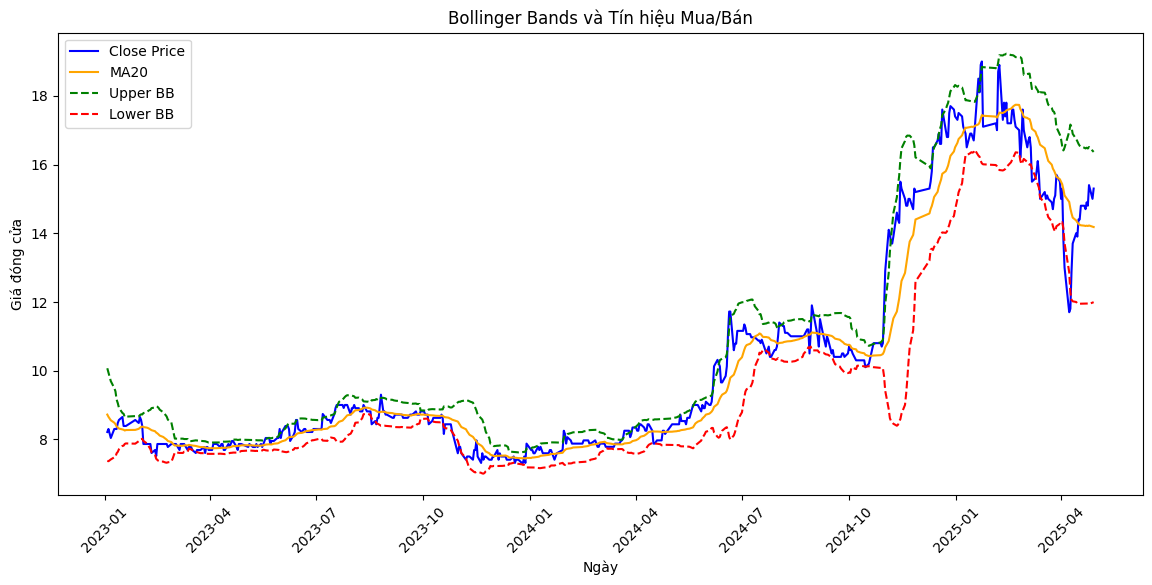

In [15]:
plot_with_signals(df, start_date='2023-01-01')

Thêm tín hiệu mua bán

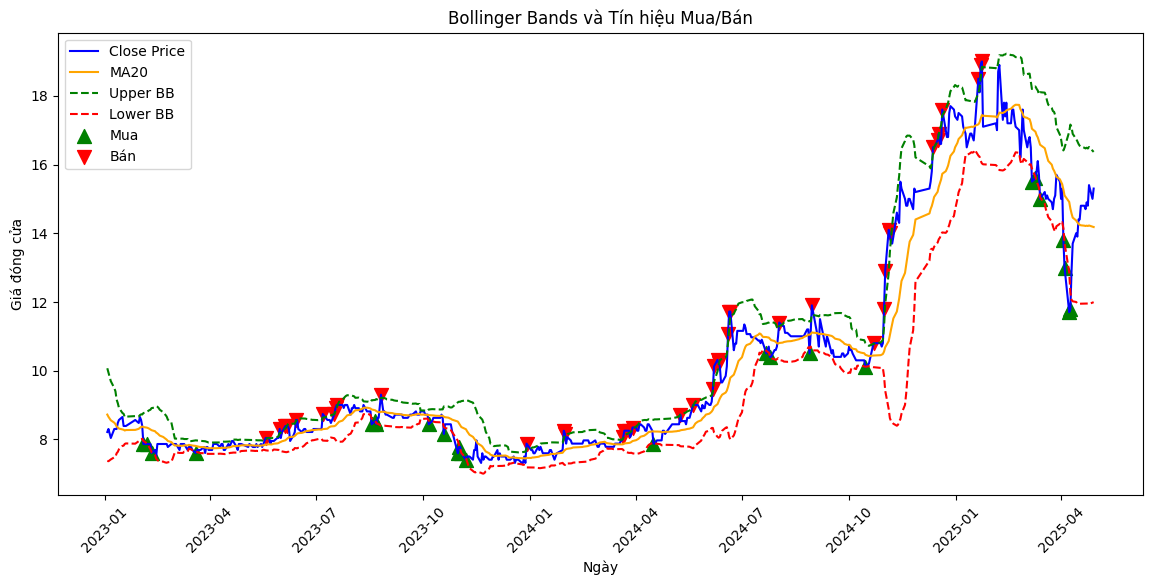

In [16]:
plot_with_signals(df, start_date='2023-01-01', signal=True)

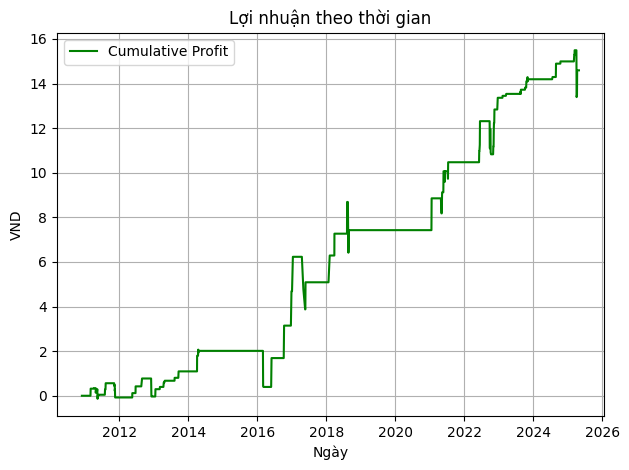

In [17]:
df['Cumulative_Profit_BB'] = df['Profit_BB'].cumsum()
plt.plot(df['Date'], df['Cumulative_Profit_BB'], label='Cumulative Profit', color='green')
plt.title('Lợi nhuận theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('VND')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Lợi nhuận tăng một cách ổn định hơn so với áp dụng chiến lược MA20, MA50

In [18]:
print(df['Profit_BB'].sum())

14.593199999999998


Ta có thể thấy lợi nhuận thư được sau 15 năm (2010 - 2025) là 14.590 trên 1 cổ phiếu ít hơn so với áp dụng chiến lược MA20, MA50

In [19]:
df.head()

,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>,MA20,MA50,Signal,Close_new,Profit,Date,Cumulative_Profit,STD20,Upper_BB,Lower_BB,Signal_BB,Profit_BB,Cumulative_Profit_BB
0,20101201,5.0006,6.4781,5.0006,6.1601,254500,NaN,NaN,0,6.2283,0.0,2010-12-01,0.0,NaN,NaN,NaN,0,0.0,0.0
1,20101202,6.2280,6.2280,6.2280,6.2283,24700,NaN,NaN,0,6.6602,0.0,2010-12-02,0.0,NaN,NaN,NaN,0,0.0,0.0
2,20101203,6.6599,6.6599,6.6599,6.6602,19500,NaN,NaN,0,7.1148,0.0,2010-12-03,0.0,NaN,NaN,NaN,0,0.0,0.0
3,20101206,7.1145,7.1145,7.1145,7.1148,54500,NaN,NaN,0,7.5922,0.0,2010-12-06,0.0,NaN,NaN,NaN,0,0.0,0.0
4,20101207,7.5918,7.5918,7.5918,7.5922,126900,NaN,NaN,0,8.1150,0.0,2010-12-07,0.0,NaN,NaN,NaN,0,0.0,0.0


Áp dụng machine learning cho việc phát hiện tín hiệu mua bán

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Chuẩn bị dữ liệu
features = ['<Open>', '<High>', '<Low>','<Volume>', 'MA20', 'MA50', 'Upper_BB', 'Lower_BB']
df_clean = df[features + ['Signal']].dropna()
X = df_clean[features]
y = df_clean['Signal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       228
           1       0.98      0.96      0.97       251

    accuracy                           0.97       479
   macro avg       0.97      0.97      0.97       479
weighted avg       0.97      0.97      0.97       479



Tất cả các chỉ số đánh giá đều rất cao, số lượng mẫu 0 và 1 cách nhau không đáng kể cho thấy dữ liệu khá cân bằng

Lưu lại model

In [77]:
import joblib
joblib.dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

Load lại model

In [79]:
loaded_model = joblib.load('random_forest_model.joblib')

Đọc dữ liệu giao dịch mới đến ngày 23-05-2025

In [87]:
new_data = pd.read_csv('CafeF.RAW_HNX.Upto23.05.2025.csv')
new_data

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,AAV,20250523,9.0,9.2,8.5,8.9,992300
1,ADC,20250523,19.2,19.2,19.2,19.2,100
2,AMC,20250523,17.5,17.5,17.5,17.5,300
3,AME,20250523,4.9,4.9,4.9,4.9,1800
4,API,20250523,7.0,7.0,6.6,6.7,892100
...,...,...,...,...,...,...,...
855898,SGH,20010725,32.8,32.8,32.8,32.8,200
855899,SGH,20010723,30.7,30.7,30.7,30.7,300
855900,SGH,20010720,28.7,28.7,28.7,28.7,200
855901,SGH,20010718,26.9,26.9,26.9,26.9,200


Lấy dữ liệu cổ phiếu VNF

In [88]:
new_data = new_data[new_data['<Ticker>'] == 'VNF']
new_data = new_data.drop('<Ticker>', axis=1)
#new_data = new_data.iloc[::-1]
new_data.reset_index(drop=True,inplace=True)
new_data


,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,20250523,14.4,15.0,14.4,15.0,38400
1,20250522,14.2,14.4,14.0,14.0,13000
2,20250521,14.1,14.6,14.1,14.4,14500
3,20250520,13.9,14.1,13.9,14.1,18400
4,20250519,13.9,14.0,13.5,13.9,19800
...,...,...,...,...,...,...
2454,20101207,33.4,33.4,33.4,33.4,126900
2455,20101206,31.3,31.3,31.3,31.3,54500
2456,20101203,29.3,29.3,29.3,29.3,19500
2457,20101202,27.4,27.4,27.4,27.4,24700


Thêm các đặc trưng trước khi cho vào model

In [89]:
new_data['MA20'] = new_data['<Close>'].rolling(window=20).mean()
new_data['MA50'] = new_data['<Close>'].rolling(window=50).mean()
new_data['STD20'] = new_data['<Close>'].rolling(window=20).std()
new_data['Upper_BB'] = new_data['MA20'] + 2 * new_data['STD20']
new_data['Lower_BB'] = new_data['MA20'] - 2 * new_data['STD20']
new_data['Close_new'] = new_data['<Close>'].shift(-1)
new_data['price fluctuations'] = new_data['Close_new'] - new_data['<Close>']
new_data


,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>,MA20,MA50,STD20,Upper_BB,Lower_BB,Close_new,price fluctuations
0,20250523,14.4,15.0,14.4,15.0,38400,NaN,NaN,NaN,NaN,NaN,14.0,-1.0
1,20250522,14.2,14.4,14.0,14.0,13000,NaN,NaN,NaN,NaN,NaN,14.4,0.4
2,20250521,14.1,14.6,14.1,14.4,14500,NaN,NaN,NaN,NaN,NaN,14.1,-0.3
3,20250520,13.9,14.1,13.9,14.1,18400,NaN,NaN,NaN,NaN,NaN,13.9,-0.2
4,20250519,13.9,14.0,13.5,13.9,19800,NaN,NaN,NaN,NaN,NaN,13.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,20101207,33.4,33.4,33.4,33.4,126900,38.750,41.034,2.223676,43.197353,34.302647,31.3,-2.1
2455,20101206,31.3,31.3,31.3,31.3,54500,38.225,40.760,2.661989,43.548978,32.901022,29.3,-2.0
2456,20101203,29.3,29.3,29.3,29.3,19500,37.690,40.476,3.288081,44.266161,31.113839,27.4,-1.9
2457,20101202,27.4,27.4,27.4,27.4,24700,37.185,40.120,4.014221,45.213443,29.156557,27.1,-0.3


In [90]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459 entries, 0 to 2458
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   <DTYYYYMMDD>        2459 non-null   int64  
 1   <Open>              2459 non-null   float64
 2   <High>              2459 non-null   float64
 3   <Low>               2459 non-null   float64
 4   <Close>             2459 non-null   float64
 5   <Volume>            2459 non-null   int64  
 6   MA20                2440 non-null   float64
 7   MA50                2410 non-null   float64
 8   STD20               2440 non-null   float64
 9   Upper_BB            2440 non-null   float64
 10  Lower_BB            2440 non-null   float64
 11  Close_new           2458 non-null   float64
 12  price fluctuations  2458 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 249.9 KB


lấy dữ liệu ngày 22-05-2025

In [ ]:
data = new_data[new_data['<DTYYYYMMDD>'] == 20250522]
data


,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>,MA20,MA50,STD20,Upper_BB,Lower_BB,Close_new,price fluctuations
26,20250414,14.1,14.1,14.0,14.0,34401,14.71,NaN,0.4303,15.5706,13.8494,13.7,-0.3


In [117]:
features = ['<Open>','<High>', '<Low>', '<Volume>', 'MA20', 'MA50', 'Upper_BB', 'Lower_BB']
predictions = loaded_model.predict(data[features])
print(predictions)

[0]


kết quả ra 1 có nghĩa là tín hiệu mua

Ta viết hàm để phân loại xem cổ phiếu đó có mua hay không

In [111]:
def dudoan(date):
    data = new_data[new_data['<DTYYYYMMDD>'] == date]
    features = ['<Open>','<High>', '<Low>', '<Volume>', 'MA20', 'MA50', 'Upper_BB', 'Lower_BB']
    predictions = loaded_model.predict(data[features])
    print(predictions)

Thử nghiệm

In [118]:
dudoan(20250414)

[0]


lấy dữ liệu sau ngày 29-04-2025

In [119]:
new_data2 = new_data[new_data['<DTYYYYMMDD>'] > 20250429]
new_data2

,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>,MA20,MA50,STD20,Upper_BB,Lower_BB,Close_new,price fluctuations
0,20250523,14.4,15.0,14.4,15.0,38400,NaN,NaN,NaN,NaN,NaN,14.0,-1.0
1,20250522,14.2,14.4,14.0,14.0,13000,NaN,NaN,NaN,NaN,NaN,14.4,0.4
2,20250521,14.1,14.6,14.1,14.4,14500,NaN,NaN,NaN,NaN,NaN,14.1,-0.3
3,20250520,13.9,14.1,13.9,14.1,18400,NaN,NaN,NaN,NaN,NaN,13.9,-0.2
4,20250519,13.9,14.0,13.5,13.9,19800,NaN,NaN,NaN,NaN,NaN,13.9,0.0
5,20250516,14.0,14.9,13.7,13.9,20200,NaN,NaN,NaN,NaN,NaN,13.9,0.0
6,20250515,14.0,14.0,13.5,13.9,18000,NaN,NaN,NaN,NaN,NaN,14.0,0.1
7,20250514,14.3,14.3,13.8,14.0,43900,NaN,NaN,NaN,NaN,NaN,14.3,0.3
8,20250513,14.5,14.6,14.2,14.3,15700,NaN,NaN,NaN,NaN,NaN,14.6,0.3
9,20250512,14.7,14.7,14.5,14.6,21100,NaN,NaN,NaN,NaN,NaN,14.7,0.1


In [125]:
def dudoan(data, loaded_model):
    features = ['<Open>','<High>', '<Low>', '<Volume>', 'MA20', 'MA50', 'Upper_BB', 'Lower_BB']
    data = pd.DataFrame([data[features]], columns=features)
    predictions = loaded_model.predict(data)
    return predictions[0]

In [127]:
new_data2['Signal'] = new_data2.apply(lambda row: dudoan(row, loaded_model), axis=1)
new_data2

C:\Users\Admin\AppData\Local\Temp\ipykernel_20460\897455804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data2['Signal'] = new_data2.apply(lambda row: dudoan(row, loaded_model), axis=1)


,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>,MA20,MA50,STD20,Upper_BB,Lower_BB,Close_new,price fluctuations,Signal
0,20250523,14.4,15.0,14.4,15.0,38400,NaN,NaN,NaN,NaN,NaN,14.0,-1.0,1
1,20250522,14.2,14.4,14.0,14.0,13000,NaN,NaN,NaN,NaN,NaN,14.4,0.4,1
2,20250521,14.1,14.6,14.1,14.4,14500,NaN,NaN,NaN,NaN,NaN,14.1,-0.3,1
3,20250520,13.9,14.1,13.9,14.1,18400,NaN,NaN,NaN,NaN,NaN,13.9,-0.2,1
4,20250519,13.9,14.0,13.5,13.9,19800,NaN,NaN,NaN,NaN,NaN,13.9,0.0,1
5,20250516,14.0,14.9,13.7,13.9,20200,NaN,NaN,NaN,NaN,NaN,13.9,0.0,1
6,20250515,14.0,14.0,13.5,13.9,18000,NaN,NaN,NaN,NaN,NaN,14.0,0.1,1
7,20250514,14.3,14.3,13.8,14.0,43900,NaN,NaN,NaN,NaN,NaN,14.3,0.3,1
8,20250513,14.5,14.6,14.2,14.3,15700,NaN,NaN,NaN,NaN,NaN,14.6,0.3,1
9,20250512,14.7,14.7,14.5,14.6,21100,NaN,NaN,NaN,NaN,NaN,14.7,0.1,1


In [128]:
new_data2['Profit'] = [new_data2.loc[id, 'Close_new'] - new_data2.loc[id, '<Close>'] if new_data2.loc[id, 'Signal'] == 1 else 0 for id in new_data2.index]


C:\Users\Admin\AppData\Local\Temp\ipykernel_20460\3285131899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data2['Profit'] = [new_data2.loc[id, 'Close_new'] - new_data2.loc[id, '<Close>'] if new_data2.loc[id, 'Signal'] == 1 else 0 for id in new_data2.index]


In [129]:
new_data2['Profit'].sum()

np.float64(0.09999999999999964)